## Content: Figure 3 -- HHE, HHW1 and HHW2 in Gillot across 1990-2100

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ticker

In [3]:
def fig3(station):
    
    '''
    This method generates a figure in three subplots.
    10-year smoothed 10-y return levels for the period 1995-2095
    10-year smoothed humid heatwave frequency (days/year) according to Method 1 and Method 2 (see the paper), 
    for period 1995-2095
    Two scenarios : SSP2-4.5 and SSP5-8.5
    Here the results for Reunion island (Gillot) are displayed.
    We show results for CMIP6 ensemble, RCM ALADIN and the GCM CNRM-ESM2-1 + Observations in historical period
    
    '''
    
    #some parameters
    rc('text', usetex=True)
    
    dirres= "/CMIP6/heatwaves"
    dirobs="/OBS/"
    dirout= "/figures"
    
    colors={'ssp245':(247/256,148/256,32/256),'ssp585':(149/256,27/256,30/256)}

    
    Scenarios=["ssp245","ssp585"]
    
    # just to get a series with the years
    years = np.arange(1995,2096)

    
    # FIGURE
    
    fig, axs = plt.subplots(ncols=1,nrows=3,
                        sharex=True,
                            #sharey=True,
                        layout='tight',
                        figsize=(5,12)) #ouvrir la figure
    
    
    
    
    
    
    # THIRD ROW -- HHW2
    
    axs[2].grid(ls='--',visible=True)

    
    axs[2].set_ylim([-5,225])
    axs[2].set_yticks([0,50,100,150,200])
    axs[2].set_yticklabels([0,50,100,150,200],fontsize=18)
    
    
    obs=np.load(dirobs+"heatwaves/"+station+"_cumul_annuel_hw_HIM_obs.npy") #Observations


    i=0
    
    for scenario in Scenarios:
        
        diraladin="/ALADIN/heatwaves"
        
        #ALADIN data
        aladin=pd.read_csv(diraladin+"/"+station+"_ALADIN_smoothed_heatwave_days_over3days_"+scenario+".csv",header=0,names=['year','nb_days'])
        
        # CMIP6 data
        q10=pd.read_csv(dirres+station+"_q10_smoothed_heatwave_HIM_days_over3days_"+scenario+"_CMIP6.csv",header=0,names=['year','nb_days'])
        q50=pd.read_csv(dirres+station+"_q50_smoothed_heatwave_HIM_days_over3days_"+scenario+"_CMIP6.csv",header=0,names=['year','nb_days'])
        q90=pd.read_csv(dirres+station+"_q90_smoothed_heatwave_HIM_days_over3days_"+scenario+"_CMIP6.csv",header=0,names=['year','nb_days'])
        
        #CNRM-ESM2-1 data
        cnrm=pd.read_csv(dirres+"/"+station+"_CNRM-ESM2-1_smoothed_heatwave_days_over3days_"+scenario+".csv").nb_days.values
    
    

        # PLOT of 10-year smoothed values
        if i==0:
            
            axs[2].plot(years[:21], q50.nb_days.values[:21], color='grey')
            axs[2].fill_between(years[:21],q10.nb_days.values[:21],y2=q90.nb_days.values[:21],alpha=0.2,fc='grey')
        
            axs[2].plot(years[:21], aladin.nb_days.values[:21], linestyle='--',color='dimgrey',label="ALADIN Historical")
            
            axs[2].plot(years[:21], cnrm[:21], ls='dashdot',lw=1,color='dimgrey',label="CNRM-ESM2-1 Historical")

            
            axs[2].plot(years[:20], obs[5:], color='black',ls='',marker='o',label='Obs',markersize=1.5)

        i+=1
        
        axs[2].plot(years[20:], q50.nb_days.values[20:], color=colors[scenario])
        axs[2].fill_between(years[20:],q10.nb_days.values[20:],y2=q90.nb_days.values[20:],alpha=0.2,fc=colors[scenario])
        
        axs[2].plot(years[20:], aladin.nb_days.values[20:],linestyle='--', color=colors[scenario],label="ALADIN")
        
        axs[2].plot(years[20:], cnrm[20:], ls='dashdot',lw=1,color=colors[scenario],label="CNRM-ESM2-1")

        axs[2].set_ylabel("Nb of days/year",fontsize=18)
        
        
    
    # ADD p99.5 (detection threshold)    
    q995_obs=pd.read_csv(dirobs+"/heatwaves/q995.csv")[station].values[0]
            
    q995_mod=np.nanmedian(pd.read_csv(dirres+"/q995.csv")[station].values)
    
    q995_cnrm=pd.read_csv(dirres+"/q995.csv").iloc[2][station]
    
    q995_aladin=pd.read_csv(diraladin+"/q995.csv")[station].values[0]
    
    axs[2].text(2000,120,'p99.5 - HIM\n\nOBS={:.1f} °C\nCMIP6={:.1f} °C\nALADIN={:.1f}°C\nCNRM-ESM2-1={:.1f}°C'.format(np.round(q995_obs,1),np.round(q995_mod,1),np.round(q995_aladin,1),np.round(q995_cnrm,1)),bbox=dict(facecolor='white'),fontsize=16)

    axs[2].set_title("HHW - HIM - Method 2",fontsize=20)
    
    
    axs[2].set_xticks(np.arange(years[0],years[-1]+10,10))    # labels tous les 10
    axs[2].set_xticklabels(np.arange(years[0],years[-1]+10,10),rotation=45,ha='right',fontsize=16)
    
    
    
    
    
    # SECOND ROW -- HHW1
    
    axs[1].set_ylim([-5,150])
    axs[1].set_yticks([0,30,60,90,120,150])
    axs[1].set_yticklabels([0,30,60,90,120,150],fontsize=18)
    
    dirobs=dirobs+'nb_days_over_NOAA_thresholds/'
    dirres=dirres+'nb_days_over_NOAA_thresholds/'

    # S2 is threshold DANGER (40°C), S1 is CAUTION, S3 is EXTREME DANGER
    # Here we use only S2
    obs_s2=pd.read_csv(dirobs+station+"_OBS_nb_days_over3days_NOAA_s2_HIX_1985-2014.csv").s2.values[5:]
    
        
    i=0
    
    for scenario in Scenarios:
        
        if scenario == 'ssp245':
            
            scenario_title='SSP2-4.5'
        else:
            scenario_title='SSP5-8.5'
        
        # ALADIN data
        dirres_aladin=diraladin
        
        aladin_s2=pd.read_csv(dirres_aladin+station+"_ALADIN_nb_days_over3days_NOAA_s2_HIX_"+scenario+"_1990-2100.csv").s2.values
        
        
        # CMIP6 data
        q10_s2=pd.read_csv(dirres+station+"_q10_s2_days_over3days_NOAA_thresholds_HIX_"+scenario+"_CMIP6.csv",header=0,names=['year','nb_days'])
        q50_s2=pd.read_csv(dirres+station+"_q50_s2_days_over3days_NOAA_thresholds_HIX_"+scenario+"_CMIP6.csv",header=0,names=['year','nb_days'])
        q90_s2=pd.read_csv(dirres+station+"_q90_s2_days_over3days_NOAA_thresholds_HIX_"+scenario+"_CMIP6.csv",header=0,names=['year','nb_days'])
        
        
        # CNRM-ESM2-1 data
        CNRM_s2= pd.read_csv(dirres+station+"_CNRM-ESM2-1_nb_days_over3days_NOAA_s2_HIX_"+scenario+"_1990-2100.csv").s2.values
    
        
        axs[1].grid(ls='--',visible=True)

        
        # Plot 10-year smoothed values
        
        if i==0:
            axs[1].plot(years[:21], q50_s2.nb_days.values[:21], color='grey',label='Historical')
            axs[1].fill_between(years[:21],q10_s2.nb_days.values[:21],y2=q90_s2.nb_days.values[:21],alpha=0.2,fc='grey')
        
            axs[1].plot(years[:21], aladin_s2[:21], color='dimgrey',ls='--',label='ALADIN Historical')
            axs[1].plot(years[:21], CNRM_s2[:21], color='dimgrey',ls='dashdot',lw=1,label='CNRM-ESM2-1 Historical')

            
        
        axs[1].plot(years[20:], q50_s2.nb_days.values[20:], color=colors[scenario],label=scenario_title)
        axs[1].fill_between(years[20:],q10_s2.nb_days.values[20:],y2=q90_s2.nb_days.values[20:],alpha=0.2,fc=colors[scenario])
        
        axs[1].plot(years[20:], aladin_s2[20:], color=colors[scenario],ls='--',label='ALADIN '+scenario_title)
        axs[1].plot(years[20:], CNRM_s2[20:], color=colors[scenario],ls='dashdot',lw=1,label='CNRM-ESM2-1 '+scenario_title)


        if i==1:
            axs[1].plot(years[:20], obs_s2[5:], color='k',ls='',marker='o',label='Obs',markersize=1.5)

        
        axs[1].legend()
            
        i+=1

        axs[1].set_xlabel("Year",fontsize=18)
        axs[1].set_ylabel("Nb of days/year",fontsize=18)
        
    axs[1].set_title("HHW - HIX - Method 1",fontsize=20)
    
    axs[1].set_xlim([1995,2095])
    
    
    
    
    # FIRST ROW : HHE
        
    dirobs="/OBS/HIX/"
    dirin ="/CMIP6/GEV/"
    dirin_aladin="/ALADIN/GEV/"
    
    
    # Obs data

    data_obs=pd.read_csv(dirobs+station+"_obs_1985-2014_HIX.csv")
        
    data_obs['time']=pd.to_datetime(data_obs['time'])
        
    max_obs=data_obs['HI'].groupby(data_obs.time.dt.year).max() #get annual maxima
    
    
    
    
    
    
    # ALADIN data
    
    RL_aladin_ssp245=xr.open_dataset(dirin_aladin+"10y-RL_HI_1990-2100_ssp245_Gillot.nc")
    RL_aladin_ssp585=xr.open_dataset(dirin_aladin+"10y-RL_HI_1990-2100_ssp585_Gillot.nc")
    
    
    # CNRM-ESM2-1 data
    
    RL_CNRM_ESM2_1_ssp245=pd.read_csv(dirin+"/10y-RL_HI_CNRM-ESM2-1_1990-2100_ssp245_Gillot.csv")
    RL_CNRM_ESM2_1_ssp585=pd.read_csv(dirin+"/10y-RL_HI_CNRM-ESM2-1_1990-2100_ssp585_Gillot.csv")


    # CMIP6 data
    RL_q10_ssp245=np.nanquantile(np.load(dirin+'/10y-RL_HI_1990-2100_ssp245_'+station+'_all_samples.npy'),0.1,axis=0)#quantiles
    RL_q90_ssp245=np.nanquantile(np.load(dirin+'/10y-RL_HI_1990-2100_ssp245_'+station+'_all_samples.npy'),0.9,axis=0)
    RL_mean_ssp245=xr.open_dataset(dirin+'/10y-RL_HI_1990-2100_ssp245_'+station+'.nc')#mean
    
            
    RL_q10_ssp585=np.nanquantile(np.load(dirin+'/10y-RL_HI_1990-2100_ssp585_'+station+'_all_samples.npy'),0.1,axis=0)#quantiles
    RL_q90_ssp585=np.nanquantile(np.load(dirin+'/10y-RL_HI_1990-2100_ssp585_'+station+'_all_samples.npy'),0.9,axis=0)
    RL_mean_ssp585=xr.open_dataset(dirin+'/10y-RL_HI_1990-2100_ssp585_'+station+'.nc')#mean
        
    
    
    # PLOT
    
    # SSP2-4.5
        
    line1=axs[0].plot(RL_mean_ssp245.year.values[:25],RL_mean_ssp245.RL.values[:25],color='grey',label='Historical')
    axs[0].fill_between(RL_mean_ssp245.year.values[:25],RL_q10_ssp245[:25],y2=RL_q90_ssp245[:25],alpha=0.2,fc='grey')
    axs[0].plot(RL_aladin_ssp245.year.values[:25], RL_aladin_ssp245.RL.values[:25], color='dimgrey',ls='--',label='ALADIN Historical')
    axs[0].plot(RL_CNRM_ESM2_1_ssp245.year.values[:25], RL_CNRM_ESM2_1_ssp245.RL.values[:25], color='dimgrey',ls='dashdot',lw=1,label='CNRM-ESM2-1 Historical')

    
    line2=axs[0].plot(RL_mean_ssp245.year.values[24:],RL_mean_ssp245.RL.values[24:],color=(247/256,148/256,32/256),label='SSP2-4.5')
    axs[0].fill_between(RL_mean_ssp245.year.values[24:],RL_q10_ssp245[24:],y2=RL_q90_ssp245[24:],alpha=0.2,fc=(247/256,148/256,32/256))
    axs[0].plot(RL_aladin_ssp245.year.values[24:], RL_aladin_ssp245.RL.values[24:], color=(247/256,148/256,32/256),ls='--',label='ALADIN SSP2-4.5')
    axs[0].plot(RL_CNRM_ESM2_1_ssp245.year.values[24:], RL_CNRM_ESM2_1_ssp245.RL.values[24:], color=(247/256,148/256,32/256),ls='dashdot',lw=1,label='CNRM-ESM2-1 SSP2-4.5')

    # SSP5-8.5
        
    axs[0].plot(RL_mean_ssp585.year.values[:25],RL_mean_ssp585.RL.values[:25],color='grey')
    axs[0].fill_between(RL_mean_ssp585.year.values[:25],RL_q10_ssp585[:25],y2=RL_q90_ssp585[:25],alpha=0.2,fc='grey')
    axs[0].plot(RL_aladin_ssp585.year.values[:25], RL_aladin_ssp585.RL.values[:25], color='dimgrey',ls='--',label='ALADIN Historical')
    axs[0].plot(RL_CNRM_ESM2_1_ssp585.year.values[:25], RL_CNRM_ESM2_1_ssp585.RL.values[:25], color='dimgrey',ls='dashdot',lw=1,label='CNRM-ESM2-1 Historical')

    
    line3=axs[0].plot(RL_mean_ssp585.year.values[24:],RL_mean_ssp585.RL.values[24:],color=(149/256,27/256,30/256),label='SSP5-8.5')
    axs[0].fill_between(RL_mean_ssp585.year.values[24:],RL_q10_ssp585[24:],y2=RL_q90_ssp585[24:],alpha=0.2,fc=(149/256,27/256,30/256))
    axs[0].plot(RL_aladin_ssp585.year.values[24:], RL_aladin_ssp585.RL.values[24:], color=(149/256,27/256,30/256),ls='--',label='ALADIN SSP2-4.5')
    axs[0].plot(RL_CNRM_ESM2_1_ssp585.year.values[24:], RL_CNRM_ESM2_1_ssp585.RL.values[24:], color=(149/256,27/256,30/256),ls='dashdot',lw=1,label='CNRM-ESM2-1 SSP5-8.5')

    # OBS
    
    line4=axs[0].plot(RL_mean_ssp585.year.values[:25], max_obs.values[5:], color='k',ls='',marker='o',label='Max obs',markersize=1.5)
     
        
        
    axs[0].set_xlim([1995,2095])
        
    axs[0].set_ylim([35,65])
    axs[0].set_yticklabels(np.arange(35,70,5),fontsize=20)
    axs[0].set_yticks(np.arange(35,70,5))
        
    axs[0].grid(ls='--',visible=True)

    axs[0].set_ylabel('HIX 10-yr return levels [°C]',fontsize=18)
        
    axs[0].set_title("Return levels",fontsize=20)
    
    fig.suptitle('HHW in '+station+' - CMIP6',fontsize=16)
    
    
    # saving
    fig.savefig(dirout+"/fig3.png",transparent=False,dpi=400) # Enregistrement du graphique en format png
    fig.savefig(dirout+"/fig3.svg",transparent=False,dpi=400) # Enregistrement du graphique en format png



In [4]:
#some other settings
markersize=13

plt.rc('legend', markerscale=1)
plt.rc('legend', title_fontsize=18)
plt.rc('legend', fontsize=13)
plt.rc('lines',markeredgewidth=1.5)
plt.rc('lines',markersize=markersize)
plt.rc('lines',linewidth=1.8)
plt.rc('errorbar',capsize=10)

/tmp/ipykernel_28419/167059182.py:255: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels(np.arange(35,70,5),fontsize=20)


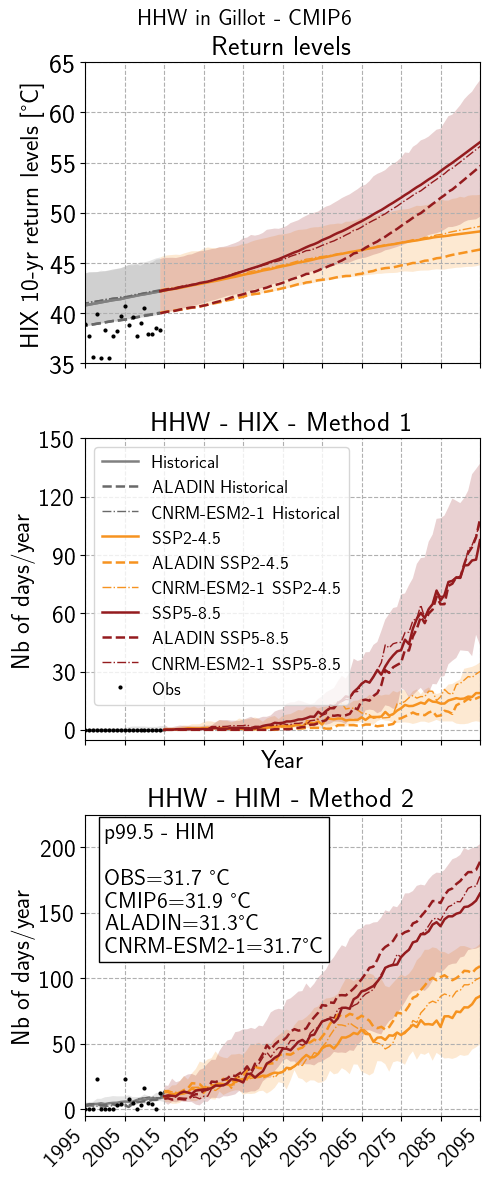

In [5]:
fig3("Gillot")